<a href="https://colab.research.google.com/github/thiagomacielbarbosa/data-engineer-analytics/blob/main/MNIST_Train_ML_GH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST_Train/Machine Learn


In [ ]:
!pip install pandas matplotlib seaborn scikit-learn tensorflow --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

plt.style.use('ggplot')
sns.set_palette("husl")
print("✅ Bibliotecas instaladas e importadas com sucesso!")

✅ Bibliotecas instaladas e importadas com sucesso!


In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('mnist_train_small.csv')

print("📊 Dataset carregado com sucesso!")
print(f"Dimensões do dataset: {df.shape}")
print("\n🔍 Primeiras 5 linhas:")
display(df.head())

Saving mnist_train_small.csv to mnist_train_small.csv
📊 Dataset carregado com sucesso!
Dimensões do dataset: (19999, 785)

🔍 Primeiras 5 linhas:


,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("📋 Informações do dataset:")
df.info()

print("\n🎯 Verificação de valores nulos:")
print(df.isnull().sum().sum())

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

print(f"\n📐 Dimensões após separação:")
print(f"X: {X.shape}, y: {y.shape}")
print(f"Valores únicos em y: {np.unique(y)}")

📋 Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Columns: 785 entries, 6 to 0.590
dtypes: int64(785)
memory usage: 119.8 MB

🎯 Verificação de valores nulos:
0

📐 Dimensões após separação:
X: (19999, 784), y: (19999,)
Valores únicos em y: [0 1 2 3 4 5 6 7 8 9]


👀 Visualizando amostras do dataset:


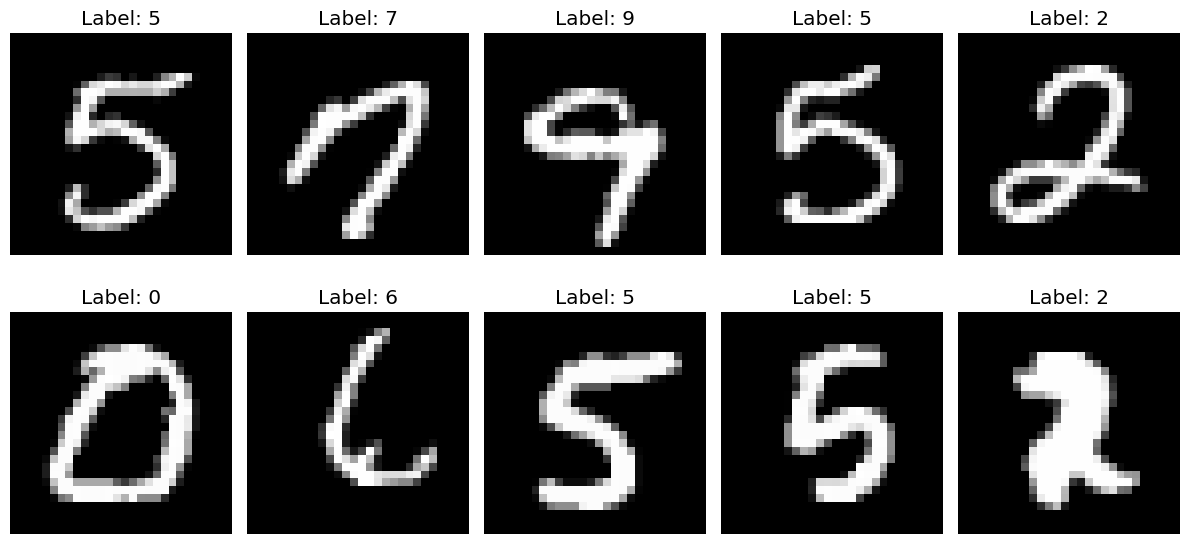

In [ ]:
print("👀 Visualizando amostras do dataset:")

plt.figure(figsize=(12, 6))

# Mostra os primeiros 10 dígitos
for i in range(10):
    plt.subplot(2, 5, i + 1)

    # Reshape para 28x28 e mostra a imagem
    digit_image = X[i].reshape(28, 28)
    plt.imshow(digit_image, cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

📊 Análise da distribuição dos dígitos:


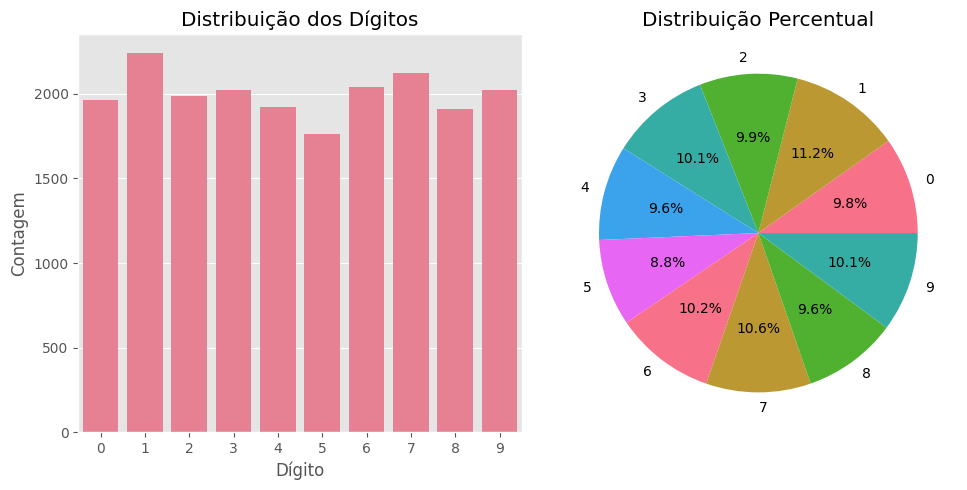


📈 Contagem por dígito:
Dígito 0: 1962 amostras (9.8%)
Dígito 1: 2243 amostras (11.2%)
Dígito 2: 1989 amostras (9.9%)
Dígito 3: 2021 amostras (10.1%)
Dígito 4: 1924 amostras (9.6%)
Dígito 5: 1761 amostras (8.8%)
Dígito 6: 2038 amostras (10.2%)
Dígito 7: 2126 amostras (10.6%)
Dígito 8: 1912 amostras (9.6%)
Dígito 9: 2023 amostras (10.1%)


In [ ]:
print("📊 Análise da distribuição dos dígitos:")


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title('Distribuição dos Dígitos')
plt.xlabel('Dígito')
plt.ylabel('Contagem')

plt.subplot(1, 2, 2)
# Calculo de porcentagens
value_counts = pd.Series(y).value_counts().sort_index()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Distribuição Percentual')

plt.tight_layout()
plt.show()

print("\n📈 Contagem por dígito:")
for digit, count in value_counts.items():
    print(f"Dígito {digit}: {count} amostras ({count/len(y)*100:.1f}%)")

🎨 Análise de intensidade dos pixels:
📊 Estatísticas dos pixels:
Mínimo: 0.00
Máximo: 255.00
Médio: 33.33
Desvio Padrão: 78.60


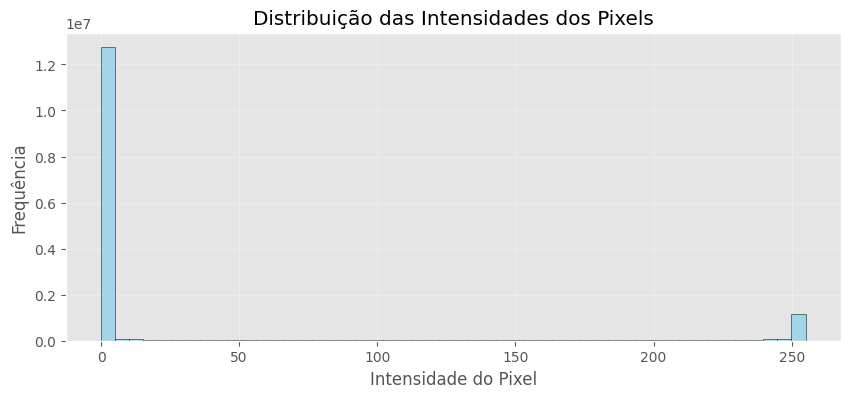

In [ ]:
print("🎨 Análise de intensidade dos pixels:")

# Calculo de estatísticas de intensidade
pixel_stats = {
    'Mínimo': X.min(),
    'Máximo': X.max(),
    'Médio': X.mean(),
    'Desvio Padrão': X.std()
}

print("📊 Estatísticas dos pixels:")
for stat, value in pixel_stats.items():
    print(f"{stat}: {value:.2f}")

# Histograma de intensidades
plt.figure(figsize=(10, 4))
plt.hist(X.flatten(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribuição das Intensidades dos Pixels')
plt.xlabel('Intensidade do Pixel')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
print("🔄 Pré-processamento dos dados...")

# Normaliza os pixels para [0, 1]
X_normalized = X / 255.0

# Divisão para treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Pré-processamento concluído!")
print(f"📐 Dimensões finais:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# Verifica a distribuição após split
print(f"\n📊 Distribuição no conjunto de treino:")
train_dist = pd.Series(y_train).value_counts().sort_index()
for digit, count in train_dist.items():
    print(f"Dígito {digit}: {count} amostras")

🔄 Pré-processamento dos dados...
✅ Pré-processamento concluído!
📐 Dimensões finais:
X_train: (15999, 784), y_train: (15999,)
X_test: (4000, 784), y_test: (4000,)

📊 Distribuição no conjunto de treino:
Dígito 0: 1570 amostras
Dígito 1: 1794 amostras
Dígito 2: 1591 amostras
Dígito 3: 1617 amostras
Dígito 4: 1539 amostras
Dígito 5: 1409 amostras
Dígito 6: 1630 amostras
Dígito 7: 1701 amostras
Dígito 8: 1530 amostras
Dígito 9: 1618 amostras


In [ ]:
print("🏗️ Construindo o modelo de rede neural...")

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("📋 Resumo do modelo:")
model.summary()

🏗️ Construindo o modelo de rede neural...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


📋 Resumo do modelo:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("🎯 Iniciando treinamento do modelo...")

# Treinando o modelo
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Avaliação final
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"🎊 Acurácia final no conjunto de teste: {test_accuracy:.4f}")

🎯 Iniciando treinamento do modelo...
Epoch 1/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5839 - loss: 1.2700 - val_accuracy: 0.9084 - val_loss: 0.3034
Epoch 2/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8918 - loss: 0.3606 - val_accuracy: 0.9312 - val_loss: 0.2230
Epoch 3/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9304 - loss: 0.2425 - val_accuracy: 0.9403 - val_loss: 0.1940
Epoch 4/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9357 - loss: 0.2277 - val_accuracy: 0.9397 - val_loss: 0.2045
Epoch 5/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9443 - loss: 0.1834 - val_accuracy: 0.9447 - val_loss: 0.1688
Epoch 6/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9524 - loss: 0.1690 - val_accuracy: 0.9450 - val_loss: 0.1651
Epoch 7/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9506 - loss: 0.1492 - val_accuracy: 0.9525 - val_loss: 0.1700
Epoch 8/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9

📈 Análise do desempenho do modelo...


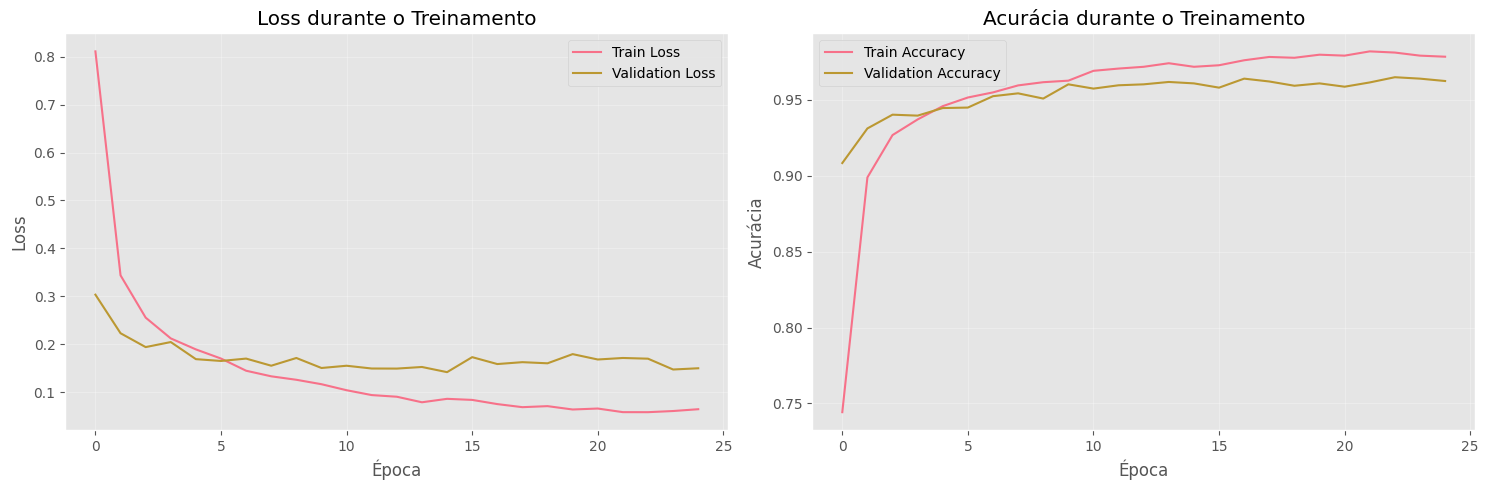

In [ ]:
print("📈 Análise do desempenho do modelo...")

# Gráficos de loss e accuracy
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loss
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Loss durante o Treinamento')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Accuracy
axes[1].plot(history.history['accuracy'], label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Acurácia durante o Treinamento')
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Acurácia')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


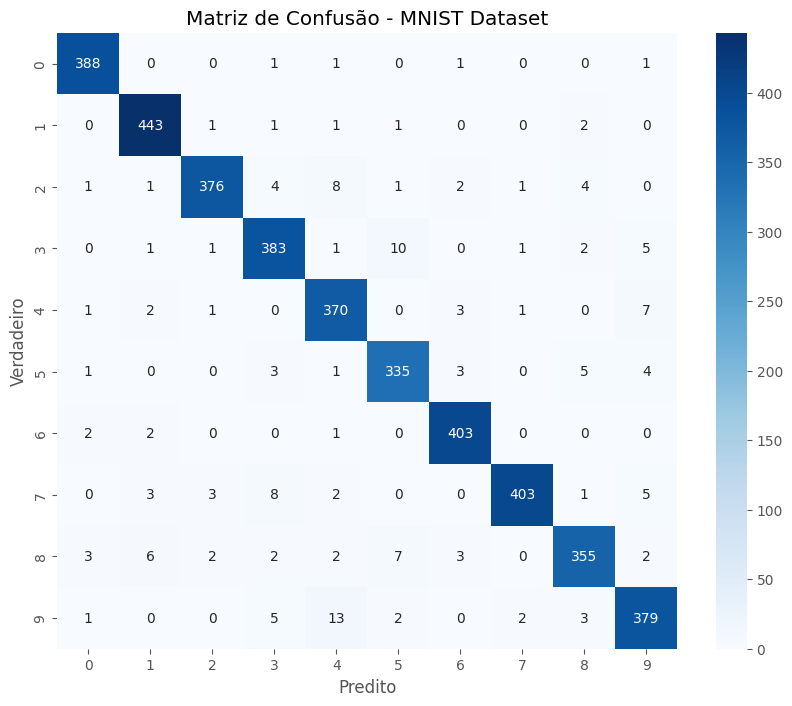

📊 Relatório de Classificação Detalhado:
              precision    recall  f1-score   support

           0     0.9773    0.9898    0.9835       392
           1     0.9672    0.9866    0.9768       449
           2     0.9792    0.9447    0.9616       398
           3     0.9410    0.9480    0.9445       404
           4     0.9250    0.9610    0.9427       385
           5     0.9410    0.9517    0.9463       352
           6     0.9711    0.9877    0.9793       408
           7     0.9877    0.9482    0.9676       425
           8     0.9543    0.9293    0.9416       382
           9     0.9404    0.9358    0.9381       405

    accuracy                         0.9587      4000
   macro avg     0.9584    0.9583    0.9582      4000
weighted avg     0.9590    0.9587    0.9587      4000



In [ ]:
# Previsões no conjunto de teste
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Matriz de confusão
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Matriz de Confusão - MNIST Dataset')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

# Relatório de classificação
print("📊 Relatório de Classificação Detalhado:")
print(classification_report(y_test, y_pred, digits=4))

# Pergunta 1: Qual é a distribuição de acurácia por dígito e quais dígitos são mais difíceis de classificar?

In [ ]:
from sklearn.metrics import balanced_accuracy_score

balanced_acc = balanced_accuracy_score(y_test, y_pred)

print("🎯 RESPOSTA 1 - ANÁLISE POR CLASSE:")
print(f"Acurácia Balanceada: {balanced_acc:.4f}")

class_report = classification_report(y_test, y_pred, output_dict=True)
print("\n📊 Acurácia por dígito:")
accuracies = []
for i in range(10):
    precision = class_report[str(i)]['precision']
    recall = class_report[str(i)]['recall']
    f1 = class_report[str(i)]['f1-score']
    accuracies.append((i, precision, recall, f1))
    print(f"  Dígito {i}: Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}")

hardest_digit = min(accuracies, key=lambda x: x[3])[0]
easiest_digit = max(accuracies, key=lambda x: x[3])[0]
print(f"\n💡 Insight: Dígito mais difícil = {hardest_digit}, Dígito mais fácil = {easiest_digit}")

🎯 RESPOSTA 1 - ANÁLISE POR CLASSE:
Acurácia Balanceada: 0.9583

📊 Acurácia por dígito:
  Dígito 0: Precision=0.977, Recall=0.990, F1=0.984
  Dígito 1: Precision=0.967, Recall=0.987, F1=0.977
  Dígito 2: Precision=0.979, Recall=0.945, F1=0.962
  Dígito 3: Precision=0.941, Recall=0.948, F1=0.945
  Dígito 4: Precision=0.925, Recall=0.961, F1=0.943
  Dígito 5: Precision=0.941, Recall=0.952, F1=0.946
  Dígito 6: Precision=0.971, Recall=0.988, F1=0.979
  Dígito 7: Precision=0.988, Recall=0.948, F1=0.968
  Dígito 8: Precision=0.954, Recall=0.929, F1=0.942
  Dígito 9: Precision=0.940, Recall=0.936, F1=0.938

💡 Insight: Dígito mais difícil = 9, Dígito mais fácil = 0


# Pergunta 2: Como a arquitetura da rede neural influencia a capacidade de aprendizado?

In [ ]:
print("🤖 RESPOSTA 2 - ANÁLISE DA ARQUITETURA:")

total_params = model.count_params()
print(f"  • Total de parâmetros: {total_params:,}")
print(f"  • Camadas: {len(model.layers)}")
print(f"  • Neurônios na primeira camada: {model.input_shape[1]}")
print(f"  • Taxa de dropout: 30%")

# Análise da curva de aprendizado
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
gap = final_train_acc - final_val_acc

print(f"  • Acurácia final (treino): {final_train_acc:.4f}")
print(f"  • Acurácia final (validação): {final_val_acc:.4f}")
print(f"  • Gap (treino - validação): {gap:.4f}")

if gap < 0.05:
    print("  ✅ Modelo generalizando bem - arquitetura adequada")
else:
    print("  ⚠️  Possível overfitting - considerar regularização adicional")

🤖 RESPOSTA 2 - ANÁLISE DA ARQUITETURA:
  • Total de parâmetros: 111,146
  • Camadas: 6
  • Neurônios na primeira camada: 784
  • Taxa de dropout: 30%
  • Acurácia final (treino): 0.9785
  • Acurácia final (validação): 0.9625
  • Gap (treino - validação): 0.0160
  ✅ Modelo generalizando bem - arquitetura adequada


# Pergunta 3: Quais dígitos são mais frequentemente confundidos e por quê?


In [ ]:
print("🔍 RESPOSTA 3 - ANÁLISE DE CONFUSÕES:")

confusion_pairs = []
for i in range(10):
    for j in range(10):
        if i != j and cm[i, j] > 0:
            confusion_pairs.append((i, j, cm[i, j]))

confusion_pairs.sort(key=lambda x: x[2], reverse=True)

print("Principais confusões entre dígitos:")
for i, j, count in confusion_pairs[:5]:
    print(f"  {i} → {j}: {count} vezes")

misclassified_idx = np.where(y_pred != y_test)[0]
common_confusion = confusion_pairs[0] if confusion_pairs else (0, 0, 0)

print(f"\n💡 Insight: A confusão mais comum é {common_confusion[0]}→{common_confusion[1]}")
print("   Isso pode ocorrer devido à similaridade visual entre esses dígitos")

🔍 RESPOSTA 3 - ANÁLISE DE CONFUSÕES:
Principais confusões entre dígitos:
  9 → 4: 13 vezes
  3 → 5: 10 vezes
  2 → 4: 8 vezes
  7 → 3: 8 vezes
  4 → 9: 7 vezes

💡 Insight: A confusão mais comum é 9→4
   Isso pode ocorrer devido à similaridade visual entre esses dígitos


# Pergunta 4: Qual é o impacto da normalização dos pixels no desempenho do modelo?

In [ ]:
print("🎨 RESPOSTA 4 - IMPACTO DA NORMALIZAÇÃO:")

# Comparando estatísticas antes e depois da normalização
print("Estatísticas dos pixels:")
print(f"  • Antes da normalização: min={X.min()}, max={X.max()}, média={X.mean():.1f}")
print(f"  • Após normalização: min={X_normalized.min()}, max={X_normalized.max()}, média={X_normalized.mean():.4f}")

print("\n📊 Benefícios da normalização:")
benefits = [
    "Convergence mais rápida durante o treinamento",
    "Estabilidade numérica melhorada",
    "Gradientes mais suaves para otimização",
    "Compatibilidade com funções de ativação"
]

for benefit in benefits:
    print(f"  • {benefit}")

print(f"\n💡 A acurácia de {test_accuracy:.4f} comprova a eficácia do pré-processamento")

🎨 RESPOSTA 4 - IMPACTO DA NORMALIZAÇÃO:
Estatísticas dos pixels:
  • Antes da normalização: min=0, max=255, média=33.3
  • Após normalização: min=0.0, max=1.0, média=0.1307

📊 Benefícios da normalização:
  • Convergence mais rápida durante o treinamento
  • Estabilidade numérica melhorada
  • Gradientes mais suaves para otimização
  • Compatibilidade com funções de ativação

💡 A acurácia de 0.9588 comprova a eficácia do pré-processamento


# Pergunta 5: Como a distribuição dos dados afeta o aprendizado do modelo?

In [ ]:
print("📈 RESPOSTA 5 - ANÁLISE DA DISTRIBUIÇÃO:")

# Análise de balanceamento
original_dist = pd.Series(y).value_counts().sort_index()
train_dist = pd.Series(y_train).value_counts().sort_index()

print("Distribuição original vs treino:")
max_diff = 0
for digit in range(10):
    orig_pct = original_dist[digit] / len(y) * 100
    train_pct = train_dist[digit] / len(y_train) * 100
    diff = abs(orig_pct - train_pct)
    max_diff = max(max_diff, diff)
    print(f"  Dígito {digit}: {orig_pct:.1f}% → {train_pct:.1f}%")

print(f"\n💡 Máxima variação na distribuição: {max_diff:.2f}%")
if max_diff < 5:
    print("✅ Dataset bem balanceado - distribuição preservada")
else:
    print("⚠️  Variação significativa - considerar rebalanceamento")

📈 RESPOSTA 5 - ANÁLISE DA DISTRIBUIÇÃO:
Distribuição original vs treino:
  Dígito 0: 9.8% → 9.8%
  Dígito 1: 11.2% → 11.2%
  Dígito 2: 9.9% → 9.9%
  Dígito 3: 10.1% → 10.1%
  Dígito 4: 9.6% → 9.6%
  Dígito 5: 8.8% → 8.8%
  Dígito 6: 10.2% → 10.2%
  Dígito 7: 10.6% → 10.6%
  Dígito 8: 9.6% → 9.6%
  Dígito 9: 10.1% → 10.1%

💡 Máxima variação na distribuição: 0.00%
✅ Dataset bem balanceado - distribuição preservada


# Pergunta 6: Quais são as limitações do modelo e como poderíamos melhorá-lo?

In [ ]:
print("🚀 RESPOSTA 6 - LIMITAÇÕES E MELHORIAS:")

print("📊 Limitações identificadas:")
limitations = [
    f"Acurácia atual: {test_accuracy:.4f} (espaço para melhoria)",
    "Modelo totalmente conectado pode não capturar padrões espaciais",
    "Dataset pequeno pode limitar capacidade de generalização",
    "Não considera rotações ou variações na escrita"
]

for i, limitation in enumerate(limitations, 1):
    print(f"  {i}. {limitation}")

print("\n💡 Sugestões de melhoria:")
improvements = [
    "Implementar redes neurais convolucionais (CNNs)",
    "Aumento de dados (data augmentation)",
    "Fine-tuning de hiperparâmetros",
    "Ensemble de múltiplos modelos",
    "Transfer learning com modelos pré-treinados"
]

for i, improvement in enumerate(improvements, 1):
    print(f"  {i}. {improvement}")

🚀 RESPOSTA 6 - LIMITAÇÕES E MELHORIAS:
📊 Limitações identificadas:
  1. Acurácia atual: 0.9588 (espaço para melhoria)
  2. Modelo totalmente conectado pode não capturar padrões espaciais
  3. Dataset pequeno pode limitar capacidade de generalização
  4. Não considera rotações ou variações na escrita

💡 Sugestões de melhoria:
  1. Implementar redes neurais convolucionais (CNNs)
  2. Aumento de dados (data augmentation)
  3. Fine-tuning de hiperparâmetros
  4. Ensemble de múltiplos modelos
  5. Transfer learning com modelos pré-treinados


# Pergunta 7: Quais aplicações práticas este modelo poderia ter no mundo real?

In [ ]:
print("🌍 RESPOSTA 7 - APLICAÇÕES PRÁTICAS:")

print("💼 Aplicações em diferentes setores:")

applications = [
    "Setor Bancário: Reconhecimento de números em cheques:cite[4]",
    "Serviços Postais: Leitura automática de códigos postais:cite[4]",
    "Gestão Documental: Digitalização de documentos manuscritos:cite[4]",
    "Educação: Correção automática de exercícios numéricos",
    "Acessibilidade: Leitores para pessoas com deficiência visual"
]

for i, application in enumerate(applications, 1):
    print(f"  {i}. {application}")

print(f"\n🎯 Próximos passos para produção:")
next_steps = [
    "Otimizar modelo para desempenho em tempo real",
    "Desenvolver API para integração com outros sistemas",
    "Coletar mais dados do domínio específico",
    "Implementar sistema de feedback contínuo"
]

for i, step in enumerate(next_steps, 1):
    print(f"  {i}. {step}")

🌍 RESPOSTA 7 - APLICAÇÕES PRÁTICAS:
💼 Aplicações em diferentes setores:
  1. Setor Bancário: Reconhecimento de números em cheques:cite[4]
  2. Serviços Postais: Leitura automática de códigos postais:cite[4]
  3. Gestão Documental: Digitalização de documentos manuscritos:cite[4]
  4. Educação: Correção automática de exercícios numéricos
  5. Acessibilidade: Leitores para pessoas com deficiência visual

🎯 Próximos passos para produção:
  1. Otimizar modelo para desempenho em tempo real
  2. Desenvolver API para integração com outros sistemas
  3. Coletar mais dados do domínio específico
  4. Implementar sistema de feedback contínuo
